<h1>WGU D212 TASK 1 REV 6 - MATTINSON</h1>

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

W:\code\wgu\py39\scripts\python.exe
python version: 3.9.7
pandas version: 1.4.1
numpy version: 1.22.1
scipy version: 1.7.3
sklearn version: 1.0.2
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [3]:
from helpers import *

get_course_filename_str version: 1.5
save_course_table_csv version: 1.4
describe_dataframe_type version: 1.1
create_scatter_plot_fig version: 1.1
create_barplot_num_vs_cat_fig version: 1.9
create_distribution_plot_from_feature_fig version: 1.9
get_unique_values_list version: 1.2
create_correlation_matrix version: 1.2
get_redundant_pairs version: 1.0
get_top_n_correlations version: 1.0
create_simple_histogram_numerical_feature_fig version: 1.10
create_stacked_barplot_cat_or_bool_feature_fig version: 1.7
create_stacked_histogram_num_feature_fig version: 1.6


In [4]:
#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

In [5]:
# import raw customer data
df_raw = pd.read_csv('data/churn_clean.csv')
df_raw.shape

(10000, 50)

In [6]:
# remove unwanted data
df_cleaned = df_raw.drop(columns=[
    'CaseOrder','UID', 'County', 
    'Interaction', 'City', 
    'Job', 'Zip','Population',
    'Lat', 'Lng','Item1','Item2',
    'Item3','Item4','Item5','Item6',
    'Item7','Item8'
])
df_cleaned.shape

(10000, 32)

In [7]:
# filter for lost customers
df_churn = df_cleaned.loc[(df_cleaned.Churn=="Yes")]
df_churn.shape

(2650, 32)

In [8]:
# filter numerical float variables
df_numerical = df_churn.select_dtypes(include="float")
df_numerical.info()
df_numerical.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              2650 non-null   float64
 1   Outage_sec_perweek  2650 non-null   float64
 2   Tenure              2650 non-null   float64
 3   MonthlyCharge       2650 non-null   float64
 4   Bandwidth_GB_Year   2650 non-null   float64
dtypes: float64(5)
memory usage: 124.2 KB


(2650, 5)

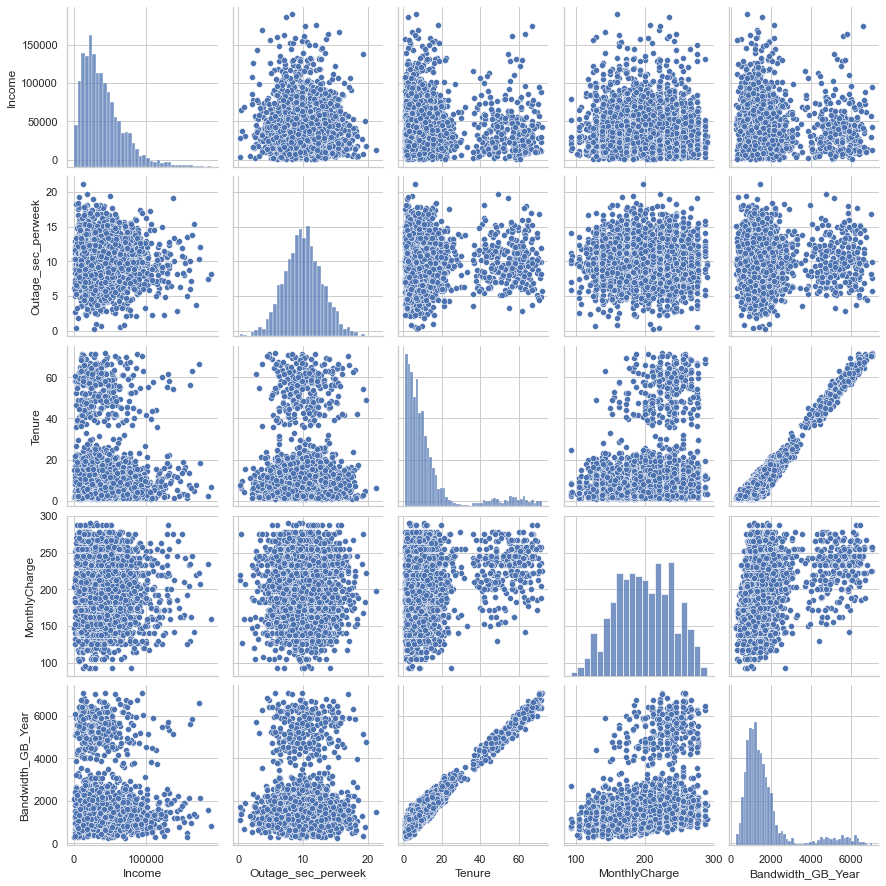

In [9]:
# describe combinations of numerical data
sns.pairplot(df_numerical)

In [10]:
# rename columns to facilitate output
df_numerical.rename(columns = {
    'Income':'INC', 
    'Outage_sec_perweek':'OUT',
    'Tenure':'TEN',
    'MonthlyCharge':'MCH',
    'Bandwidth_GB_Year':'BAN'
}, inplace = True)
df_numerical.info()
df_numerical.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INC     2650 non-null   float64
 1   OUT     2650 non-null   float64
 2   TEN     2650 non-null   float64
 3   MCH     2650 non-null   float64
 4   BAN     2650 non-null   float64
dtypes: float64(5)
memory usage: 124.2 KB


(2650, 5)

In [11]:
# describe numerical data - highlight small std
df = df_numerical.describe().round(3).T
def highlight_cells(val, color_if_true):
    color = color_if_true if val <= 3  else ''
    return 'background-color: {}'.format(color)
df[['mean','std','min','max']].style.applymap(highlight_cells, 
    color_if_true='yellow', subset=['std'])

,mean,std,min,max
INC,40085.758000,28623.988000,348.670000,189938.400000
OUT,10.001000,2.970000,0.232000,21.207000
TEN,13.148000,15.577000,1.000000,71.646000
MCH,199.295000,41.268000,92.455000,290.160000
BAN,1785.009000,1375.370000,248.179000,7096.495000


In [12]:
# describe variables as continuous or categorical
describe_dataframe_type(df_numerical)


1. INC is numerical (CONTINUOUS) - type: float64.
  Min: 348.670  Max: 189938.400  Std: 28623.988

2. OUT is numerical (CONTINUOUS) - type: float64.
  Min: 0.232  Max: 21.207  Std: 2.970

3. TEN is numerical (CONTINUOUS) - type: float64.
  Min: 1.000  Max: 71.646  Std: 15.577

4. MCH is numerical (CONTINUOUS) - type: float64.
  Min: 92.455  Max: 290.160  Std: 41.268

5. BAN is numerical (CONTINUOUS) - type: float64.
  Min: 248.179  Max: 7096.495  Std: 1375.370


In [13]:
save_course_table_csv(data=df_cleaned, 
    title='CLEANED', title_only=True )

,0,1,2,3
Customer_id,K409198,S120509,K191035,D90850
State,AK,MI,OR,CA
Area,Urban,Urban,Urban,Suburban
TimeZone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,Widowed,Married,Widowed,Married
Gender,Male,Female,Female,Male
Churn,No,Yes,No,No


shape: (10000, 32)
Table saved to: TABLES/CLEANED.CSV


In [16]:
# remove highly correlated variables
df_final = df_numerical.drop(columns=['BAN'])
df_final.info()
df_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INC     2650 non-null   float64
 1   OUT     2650 non-null   float64
 2   TEN     2650 non-null   float64
 3   MCH     2650 non-null   float64
dtypes: float64(4)
memory usage: 103.5 KB


(2650, 4)

In [17]:
# describe standardized data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final.values)
df_standardized = pd.DataFrame(scaled_features,
        index=df_final.index, 
      columns=df_final.columns)
df = df_standardized.describe().round(2).T
def highlight_cells(val, color_if_true):
    color = color_if_true if val >= 3  else ''
    return 'background-color: {}'.format(color)
df[['mean','std','min','max']].style.applymap(highlight_cells, 
    color_if_true='yellow', subset=['max'])

,mean,std,min,max
INC,-0.000000,1.000000,-1.390000,5.240000
OUT,0.000000,1.000000,-3.290000,3.770000
TEN,-0.000000,1.000000,-0.780000,3.760000
MCH,-0.000000,1.000000,-2.590000,2.200000


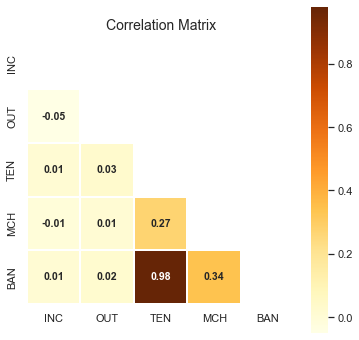

In [20]:
# use heatmap graph to identify highly correlated variables
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(6,6))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

M = df_numerical
Generate_heatmap_graph(
    round(M.corr(),2), 
    chart_title = 'Correlation Matrix',
    mask_uppertri = True)    

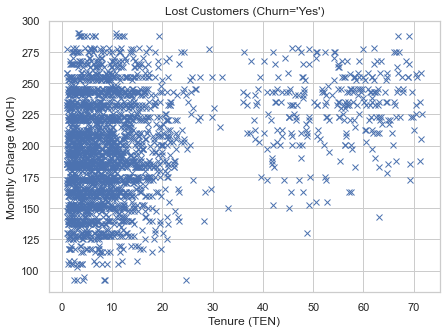

In [21]:
# create scatter plot of lost customers
fig, ax = plt.subplots(figsize =(7, 5))
plt.plot(df_numerical["TEN"], df_numerical["MCH"], marker="x", linestyle="")
plt.xlabel("Tenure (TEN)")
plt.ylabel("Monthly Charge (MCH)")
plt.title("Lost Customers (Churn='Yes')")
fig.savefig("figures/fig_1", dpi=150) 

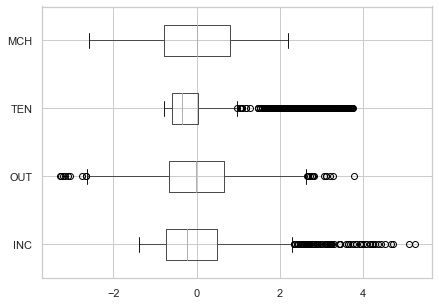

In [22]:
# use boxplot to look for outliers
fig, ax = plt.subplots(figsize =(7, 5))
ax = df_standardized.boxplot(vert=False)

## Elbow method

Optimum: (3, 1251.564)


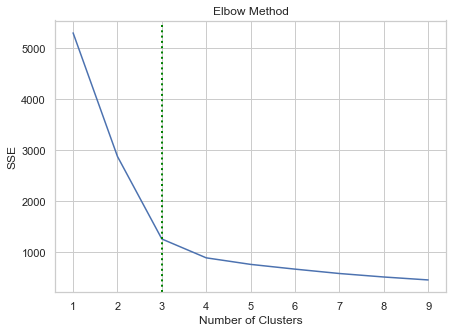

In [23]:
# find number of clusters using elbow, adapted code (Arvai, 2022)
M = df_standardized[['TEN','MCH']]
sse = [] # list of SSE values for each k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(M)
    sse.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize =(7, 5))
knee = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
plt.plot(range(1,10), sse)
plt.xticks(range(1,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.axvline(x=knee.elbow, color='green', ls=':', lw=2,)
fig.savefig("figures/fig_2a", dpi=150)
# optimum point on knee plot
print('Optimum: ({}, {:.3f})'.format(knee.elbow, sse[knee.elbow-1]))

## Silhouette method

Max element :  0.6091972075742905
Returned tuple of arrays : (array([0], dtype=int64),)
List of Indices of maximum element : [0]


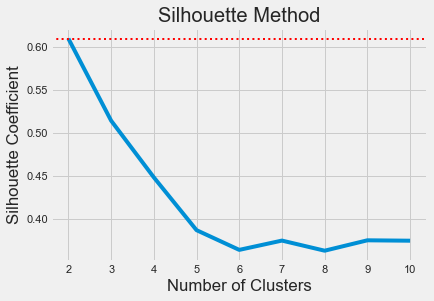

In [25]:
# find number of clusters using silhouette method, adapted code (Arvai, 2022)
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(M)
    score = silhouette_score(M, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
ymax = np.amax(silhouette_coefficients)
print('Max element : ', ymax)
# Get the indices of maximum element in numpy array
result = np.where(silhouette_coefficients == np.amax(silhouette_coefficients))
print('Returned tuple of arrays :', result)
print('List of Indices of maximum element :', result[0])
plt.axhline(y=ymax, color='red', ls=':', lw=2,)
fig.savefig("figures/fig_2b", dpi=150)


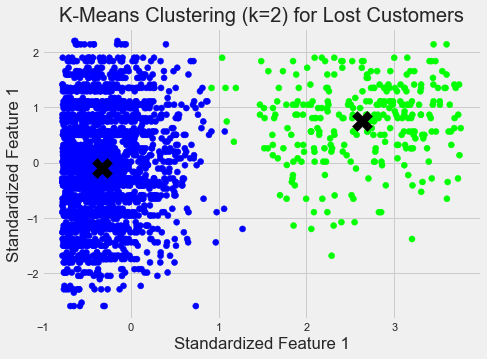

In [28]:
# final K-means analysis plot
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(M)
fig, ax = plt.subplots(figsize =(7, 5))
title = 'K-Means Clustering (k=' + str(n_clusters) + ') for Lost Customers'
ax.scatter(x=M. iloc[:, 0],y=M. iloc[:, 1],
    c=kmeans.labels_,cmap='brg')
ax.scatter(x=kmeans.cluster_centers_[:,0],
    y=kmeans.cluster_centers_[:,1],
    color='black', marker='X',s=400 )
ax.set_xlabel('Standardized Feature 1')
ax.set_ylabel('Standardized Feature 1')
plt.title(title)
fig.savefig("figures/fig_3_k_2", dpi=150)

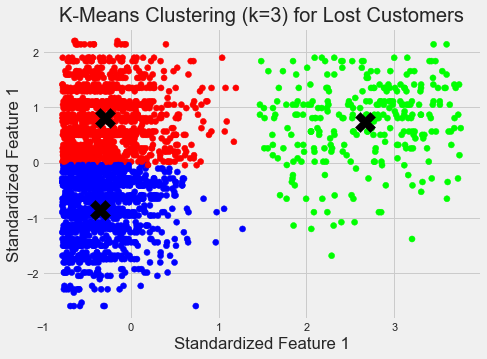

In [29]:
# final K-means analysis plot
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=10)
kmeans.fit(M)
fig, ax = plt.subplots(figsize =(7, 5))
title = 'K-Means Clustering (k=' + str(n_clusters) + ') for Lost Customers'
ax.scatter(x=M. iloc[:, 0],y=M. iloc[:, 1],
    c=kmeans.labels_,cmap='brg')
ax.scatter(x=kmeans.cluster_centers_[:,0],
    y=kmeans.cluster_centers_[:,1],
    color='black', marker='X',s=400 )
ax.set_xlabel('Standardized Feature 1')
ax.set_ylabel('Standardized Feature 1')
plt.title(title)
fig.savefig("figures/fig_3_k_3", dpi=150)

## Silhouette coefficients

In [30]:
# adapted from code:
#https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
from sklearn.metrics import silhouette_score
M = df_standardized[['TEN','MCH']]
for i in range(2,8):
    KMean= KMeans(n_clusters=i, random_state=10)
    KMean.fit(M)
    cluster_labels=KMean.predict(M)
    silhouette_avg = silhouette_score(M, cluster_labels)
    print('Silhouette score (n={}) is {:.8f}'.format(i,silhouette_avg  ))

Silhouette score (n=2) is 0.60919721
Silhouette score (n=3) is 0.51402229
Silhouette score (n=4) is 0.44820391
Silhouette score (n=5) is 0.38693915
Silhouette score (n=6) is 0.36404932
Silhouette score (n=7) is 0.37483239


In [ ]:
# adapted from code:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
M = df_standardized[['TEN','MCH']]
X = M.to_numpy()
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered lost customer data.")
    ax2.set_xlabel("Tenure")
    ax2.set_ylabel("Monthly Charge")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on lost customer data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## a monty python moment

In [27]:
# python moment
favorite_python_quote = "None_shall pass._B.K."
words = favorite_python_quote.split(' ')
for w in words:
    print(pyfiglet.figlet_format(w))

 _   _                          _           _ _ 
| \ | | ___  _ __   ___     ___| |__   __ _| | |
|  \| |/ _ \| '_ \ / _ \   / __| '_ \ / _` | | |
| |\  | (_) | | | |  __/   \__ \ | | | (_| | | |
|_| \_|\___/|_| |_|\___|___|___/_| |_|\__,_|_|_|
                      |_____|                   

                           ____   _  __  
 _ __   __ _ ___ ___      | __ ) | |/ /  
| '_ \ / _` / __/ __|     |  _ \ | ' /   
| |_) | (_| \__ \__ \_    | |_) || . \ _ 
| .__/ \__,_|___/___(_)___|____(_)_|\_(_)
|_|                  |_____|             

